In [1]:
import os
from classy import Class
from matplotlib import pyplot as plt
from fit import *

2024-05-31 12:19:19.294551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rneveux/local/lib:/home/rneveux/lib:/home/rneveux/local/lib:/home/rneveux/lib:/home/rneveux/cuba:/home/rneveux/cuba
2024-05-31 12:19:19.294570: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
estimator = ['Pk', 'Bk']

multipoles = ['0','2', '000', '202']

k_edges = {
    'Pk': 
           {'0': [0.01, 0.18], 
            '2': [0.01, 0.18]},
    'Bk': 
           {'000': [0.01, 0.08], 
            '202': [0.01, 0.08]},
            }

cov_mock_nb = 1000

In [3]:
cl = PrepareFit(estimator, multipoles, k_edges, cov_mock_nb)

In [4]:
data_dir = '/home/swang/share/rneveux/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/stable/'
    
name_file = {
    'Pk': 
           {'0': os.path.join(data_dir,'powspec/pk0_CubicBox_rsd_phmean_kpk'), 
            '2': os.path.join(data_dir,'powspec/pk2_CubicBox_rsd_phmean_kpk')},
    'Bk': 
           {'000': os.path.join(data_dir,'bispec/bk000_CubicBox_rsd_phmean_kbk'), 
            '202': os.path.join(data_dir,'bispec/bk202_CubicBox_rsd_phmean_kbk')},
            }

In [5]:
cl.data_prep(name_file)

In [6]:
cov_file = '/home/rneveux/covariance_matrix/cov_FirstGenMocks_EZmock_Cubic_LRG_z0.800_pk0_pk2_pk4_bk000_bk202.npy'
rescale = 1/25

In [7]:
cl.cov_prep(cov_name=cov_file, rescale=rescale)

In [8]:
window = False
mean_density = 1e-3
h_fid = .6736
omega_b_fid = .02237
omega_cdm_fid = .12
n_s_fid = .9649
A_s_fid = 2.0830e-9

cosmo_fid = {
                'output': 'mPk',
                'h': h_fid,
                'omega_b': omega_b_fid,
                'omega_cdm': omega_cdm_fid,
                'n_s': n_s_fid,
                'A_s': A_s_fid,
                'tau_reio': 0.0544,
                'N_ncdm': 1.,
                'omega_ncdm': .0006442,
                'N_ur': 2.0328,
                'z_max_pk': 4.5,
                'P_k_max_h/Mpc': 50.,
                }

direct_classpt = False

'''
prior = {
    'b1' : {'type': 'Uni', 'lim': [0, 4]},
    'b2' : {'type': 'Uni', 'lim': [-15, 15]},
    'bG2' : {'type': 'Uni', 'lim': [-15, 15]},
    'bGamma3' : {'type': 'Uni', 'lim': [-15, 15]},
    'c0' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'c2pp' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'ch' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'c1' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'c2' : {'type': 'Uni', 'lim': [-1000, 1000]},
    'Pshot' : {'type': 'Uni', 'lim': [-10, 10]},
    'Bshot' : {'type': 'Uni', 'lim': [-10, 10]},
    'a0': {'type': 'Uni', 'lim': [-1000, 1000]},
    'omega_cdm' : { 'type': 'Fix', 'lim': .12},
    'omega_b': { 'type': 'Fix', 'lim': .02237},
    'h': {  'type': 'Fix', 'lim': .6736},
    'n_s': { 'type': 'Fix', 'lim': .9649},
    'ln10^{10}A_s': { 'type': 'Fix', 'lim': 3.044},
}
'''
prior = {
    'b1' : {'type': 'Uni', 'lim': [0, 4]},
    'b2' : {'type': 'Gauss', 'lim': [0, 1]},
    'bG2' : {'type': 'Gauss', 'lim': [0, 1]},
    'bGamma3' : {'type': 'Gauss', 'lim': [-.45, 1]},
    'c0' : {'type': 'Gauss', 'lim': [4, 10]},
    'c2pp' : {'type': 'Gauss', 'lim': [20, 20]},
    'ch' : {'type': 'Gauss', 'lim': [500, 500]},
    'c1' : {'type': 'Gauss', 'lim': [0, 5]},
    'c2' : {'type': 'Gauss', 'lim': [0, 5]},
    'Pshot' : {'type': 'Gauss', 'lim': [0, 1]},
    'Bshot' : {'type': 'Gauss', 'lim': [1, 1]},
    'a0': {'type': 'Gauss', 'lim': [0, 1]},
    'omega_cdm' : { 'type': 'Fix', 'lim': .12},
    'omega_b': { 'type': 'Fix', 'lim': .02237},
    'h': {  'type': 'Fix', 'lim': .6736},
    'n_s': { 'type': 'Fix', 'lim': .9649},
    'ln10^{10}A_s': { 'type': 'Fix', 'lim': 3.044},
}

c_inference = False
for p in ['h', 'omega_b', 'omega_cdm', 'n_s', 'ln10^{10}A_s']:
    if prior[p]['type']!= 'Fix':
        c_inference = True
        if direct_classpt:
            c_inference = 'classpt'
            cosmo_classpt = cosmo_fid.copy()
            del cosmo_classpt['A_s']
        break
        
z_eff = 0.8
ortho_LSS = False
multipoles_to_use = {'Bk':['000', '202']}
with_kernels = 'pre-computed'
kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20/'


params = {'prior':prior, 'cosmo_inference':c_inference, 'z_eff':z_eff,
              'cosmo_fid':cosmo_fid, 'mean_density':mean_density, 'window':window,
                'ortho_LSS' : ortho_LSS, 'with_kernels': with_kernels, 'multipoles_to_use':multipoles_to_use, 'kernels_directory': kernels_directory}


          
save_directory = 'home/rneveux/test_results'
name_save = 'test'

In [9]:
cl.fit(save_directory, name_save, params, minuit=True, jup=True)

theta [1.4727741918948527, -1.7824164077462135, 1.3378197180099969, 0.040134810017455225, -6.280580317156986, 34.52861368082456, 0.7686576265576134, -6.237735396397336, 731.3321226848697, -2.355438605231058, 0.0, 2.0614735234343566]
sorted ['b1', 'b2', 'bG2', 'bGamma3', 'c0', 'c2pp', 'c1', 'c2', 'ch', 'Pshot', 'a0', 'Bshot']


/home/rneveux/bispectrum/fit/fit.py:69: RuntimeWarning: invalid value encountered in double_scalars
  log_prior_prob -= 0.5 * ((value - params['prior'][par]['lim'][0]) / params['prior'][par]['lim'][1]) ** 2


In [10]:
cl.m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = nan                        │             Nfcn = 1009              │
│ EDM = nan (Goal: 0.0002)         │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b1      │  1.4728   │    nan    │            │            │  1e-10  │    4    │       │
│ 1 │ b2      │  -1.7824  │    nan    │            │            │         │         │       │
│ 2 │ bG2     │  1.3378   │    nan    │            │            │         │         │       │
│ 3 │ bGamma3 │ 4.0135e-2 │    nan    │            │            │         │         │       │
│ 4 │ c0      │  -6.2806  │    nan    │            │            │         │         │       │
│ 5 │ c2pp    │ 3.4529e1  │    nan    │            │            │         │         │       │
│ 6 │ c1      │ 7.6866e-1 │    nan    │            │            │         │         │       │
│ 7 │ c2      │  -6.2377  │    nan    │            │            │         │         │       │
│ 8 │ ch      │ 7.3133e2  │    nan    │            │            │         │         │       │
│ 9 │ Pshot   │  -2.3554  │    nan    │            │            │         │         │       │
│ 10│ a0      │     0     │    nan    │            │            │         │         │       │
│ 11│ Bshot   │  2.0615   │    nan    │            │            │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬─────────────────────────────────────────────────────────────────────────────────────────────────┐
│         │      b1      b2     bG2 bGamma3      c0    c2pp      c1      c2      ch   Pshot      a0   Bshot │
├─────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│      b1 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│      b2 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│     bG2 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│ bGamma3 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│      c0 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│    c2pp │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│      c1 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│      c2 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│      ch │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│   Pshot │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│      a0 │     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan │
│   Bshot │     nan     nan     nan     nan 

In [11]:
b1_profile = cl.m.mnprofile(vname = 'b1', bound = 5)

/home/rneveux/.local/lib/python3.9/site-packages/iminuit/minuit.py:1508: IMinuitWarning: MIGRAD fails to converge for b1=nan
  warnings.warn(


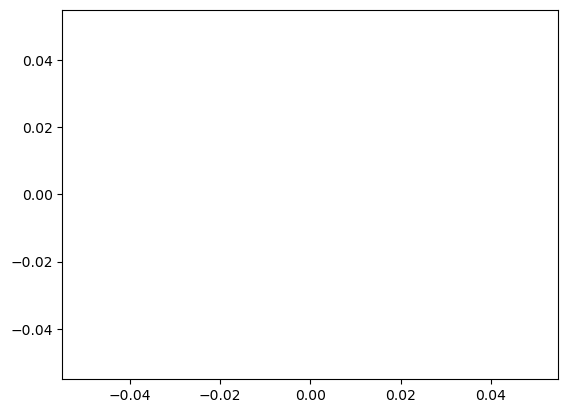

In [12]:
plt.plot(b1_profile[0], b1_profile[1])